Solução numérica prlo método de Euler
================================

O método de Euler aproxima a derivada de uma função em um dado ponto por uma secante que passa por esse ponto. A aproximação depende de um passo $h$ que está relacionado com a precisão de o modelo acompanhar o caminho da curva. Esse método tem uma aplicação computacional simples e pode ser realizada como mostrado nas próximas células.

In [1]:
import numpy as np
# Plotagem gráfica
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Definindo a função de solução

A função de solução é a que executará o método de Euler iterativamente para aproximar todos os pontos determinados pelo passo $h$ dentro do intervalo que seja solicitado. A função recebe, basicamente, as concentrações iniciais do sistema (condições iniciais), o intervalo de tempo que será aproximado e o tamanho do passo que o método dará.

In [ ]:
def oregonator_euler(X0: float, Y0: float, Z0: float, t0: float, tf: float, h: float=0.001):
    """
    Realiza o cálculo das concentrações de X, Y e Z (compostos químicos) de uma
    reação conhecida como Oregonator.

    Args:
        X0 (float): Valor inicial de X
        Y0 (float):Valor inicial de Y
        Z0 (float): Valor inicial de Z
        t0 (float): O tempo inicial da solução
        tf (float): O tempo final da solução
        h (float, optional): O passo que será dado pelo programa. Defaults to 0.001.

    Returns:
        t (ndarray): O array de tempo. Os valores são Reais
        Xy (ndarray): Os valores encontrados de X para cada t. Os valores são Reais
        Yy (ndarray): Os valores encontrados de Y para cada t. Os valores são Reais
        Zy (ndarray): Os valores encontrados de Z para cada t. Os valores são Reais
    """

    #####----- Criando o "cenário" de solução -----#####
    t = np.arange(t0, tf+1, h) # Partições do espaço
    n = len(t)
    
    #####----- Funções -----#####
    def F(t, u):

        #####----- Constantes -----#####
        # Parâmetros adimensionais
        const_ef = 0.00012    # ε' - parâmetro de escala temporal para y
        const_e = 0.036       # ε - parâmetro de escala temporal para x  
        const_f = 1           # f - fator estequiométrico
        const_q = 0.00024     # q - razão de reação

        x, y, z = u
        dxdt = (const_q*y - x*y + x - x*x) / const_e
        dydt = (-const_q*y - x*y + const_f*z) / const_ef
        dzdt = x - z
        return np.array([dxdt, dydt, dzdt], dtype=float)

    # U é o conjunto geralmente chamado de Y
    U = np.zeros((n, 3))
    U[0] = [X0, Y0, Z0] # Um arrya de funções


    #####----- Iterações -----#####
    for i in range(n - 1):
        # U é um vetor de y de equações diferenciais
        ui = U[i] # Pega um conjunto de valores anteriores para X, Y, Z
        ti = t[i]
        U[i + 1] = U[i] + h * F(ti, ui)
    Xy, Yy, Zy = U.T

    return t, Xy, Yy, Zy

A função `F` que está dentro da função principal é uma auxiliar e permite escrever com facilidade quem são as EDOs acopladas que temos. Vale notar que o algoritmo acima pretende, como lógica de funcionamento, guardar os valores resultados das aproximações em uma grande matriz 3 X (n° aproximações). Esse fato, conciliado com a biblioteca `numpy` torna o código mais eficiente. O retorno da função são `arrays` que contém as concentrações para cada instante de tempo.

### Executando a função

In [3]:
t, X, Y, Z = oregonator_euler(0.1, 0.1, 0.1, 0, 40, 0.00001)

# X --> HBrO2
# Y --> Ce4+
# Z --> z

## Plotagem

A partir de agora o código passa a não ser o grande foco, mas sim os gráficos que ele está gerando. 

OBS: A célula abaixo possui dois comandos `comentados`. O primeiro aplica um estilo mais "bonito" e "científico" para os gráficos; o segundo aplica o compilador LaTeX nos gráficos. Estão comentados pois o primeiro precisa da instalação do módulo `scienceplots` e o segundo pois torna a plotagem um pouco mais demorada.

In [4]:
# import scienceplots
# plt.style.use(['science', 'notebook'])

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "figure.dpi": 300
# })

### Gráfico das concentrações pelo tempo

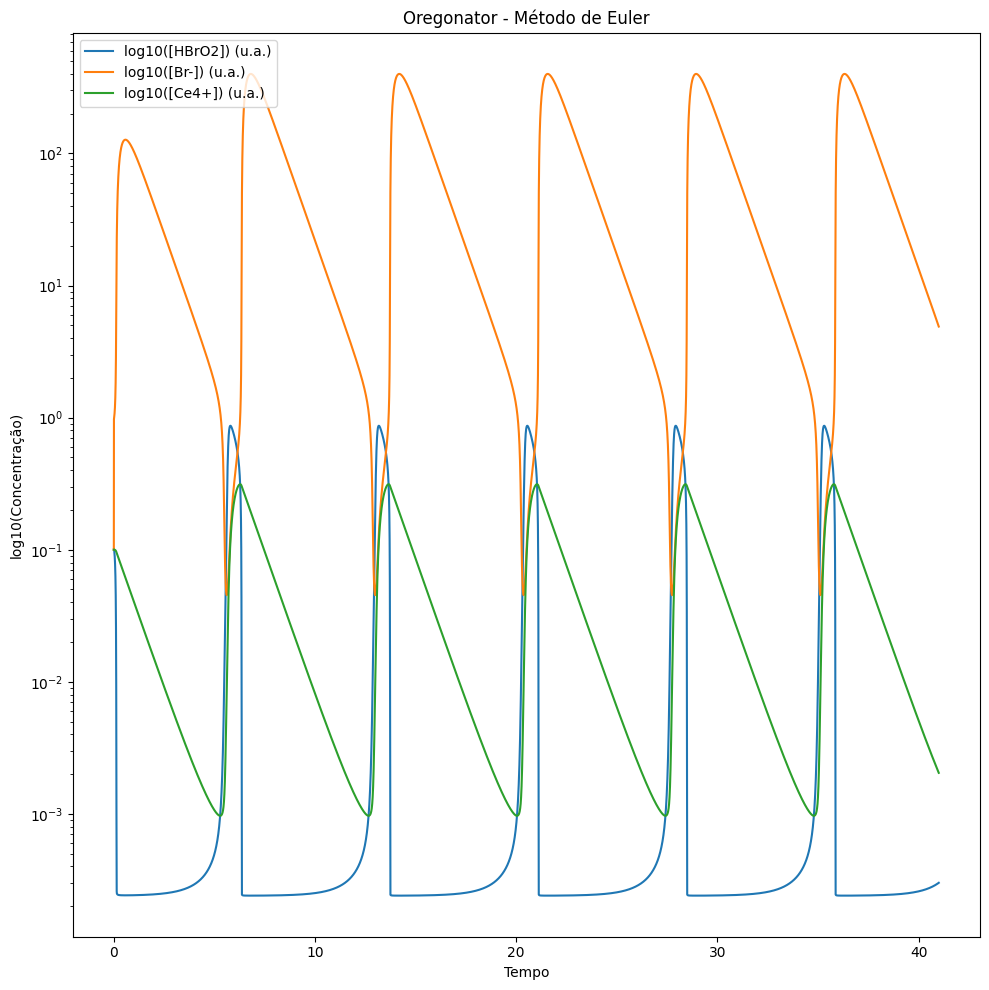

In [5]:
# Plotando os resultados
plt.figure(figsize=(10, 10))
plt.plot(t, X, label='log10([HBrO2]) (u.a.)') # Plot do HBrO2
plt.plot(t, Y, label='log10([Br-]) (u.a.)') # Plot do Ce4+
plt.plot(t, Z, label='log10([Ce4+]) (u.a.)') # Plot de z também
plt.xlabel('Tempo')
plt.ylabel('log10(Concentração)')
plt.title(f'Oregonator - Método de Euler')
plt.legend(loc='upper left')
plt.yscale('log')


plt.tight_layout()
plt.savefig(f'Oregonator_Euler.pdf')
plt.savefig(f'Oregonator_Euler.png')
plt.show()

Acima está o gráfico que elucida o comportamento oscilatório da reação Belousov–Zhabotinsky. Ele está representando, em escala logarítmica, o comportamento das concentrações de ácido bromoso (HBrO2), íon bromo (Br-) e Cério (Ce4+). Nota-se a repetição de padrões de subida e decida, assim como uma convergência para um mesmo ponto. Isto torna claro que a reação está continuamente  variando as concentrações dos reagentes de forma cíclica, voltando sempre a um mesmo estado inicial.

### Espaço de fase 3D

O espaço de fase é um gráfico em que seus eixos são os resultados da função encontrada ao solucionar a EDO. Ele permite o entendimento de como a variação de um composto químico, nesse caso, altera o outro. Podemos visualizar esse espaço em 3 dimensões pois possuímos 3 equações. Caso eles estivessem em maior número, não seria possível realizar a análise com um espaço com o mesmo número de dimensões que o número de equações.

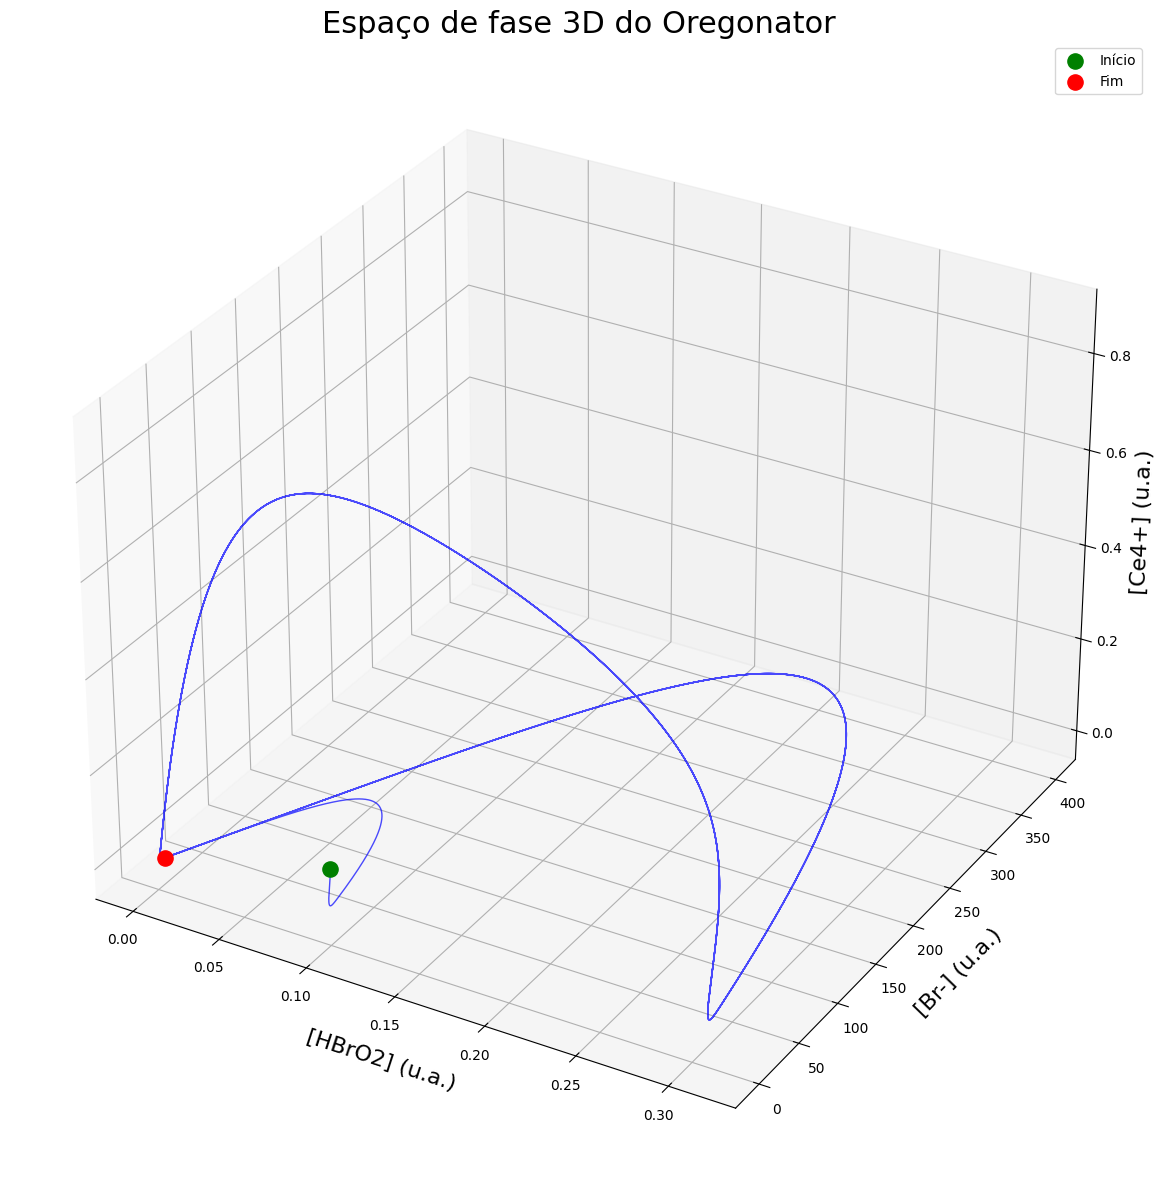

In [9]:
# Diagrama de fases 3D completo
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

s = 120
 
# Criando o diagrama 3D
ax.plot(Z, Y, X, 'b-', alpha=0.7, linewidth=1)
ax.scatter(Z[0], Y[0], X[0], color='green', s=s, label='Início') # Marca o início no gráfico
ax.scatter(Z[-1], Y[-1], X[-1], color='red', s=s, label='Fim') # Marca o final no gráfico
 
ax.set_xlabel('\n[HBrO2] (u.a.)', fontsize=16)
ax.set_ylabel('\n[Br-] (u.a.)', fontsize=16)
ax.set_zlabel('[Ce4+] (u.a.)', fontsize=16)
# ax.tick_params(labelsize=12)
ax.set_title('Espaço de fase 3D do Oregonator', fontsize=22)

plt.legend()

plt.tight_layout()
plt.savefig('3D_Euler_Oregonator.pdf', dpi=300, bbox_inches='tight')
plt.savefig('3D_Euler_Oregonator.png', dpi=300, bbox_inches='tight')
plt.show()

É possível notar que após o início da reação o modelo alcança um ciclo em que permanece continuamente  oscilando.

### Espaços de fase dois a dois

Assim como fizemos um plano de fases de trÊs dimensões, podemos fazer gráficos de duas dimensões. Contudo, dado que possuímos três equações, precisaremos de três gráficos para relacionar as concentrações 2 a 2.

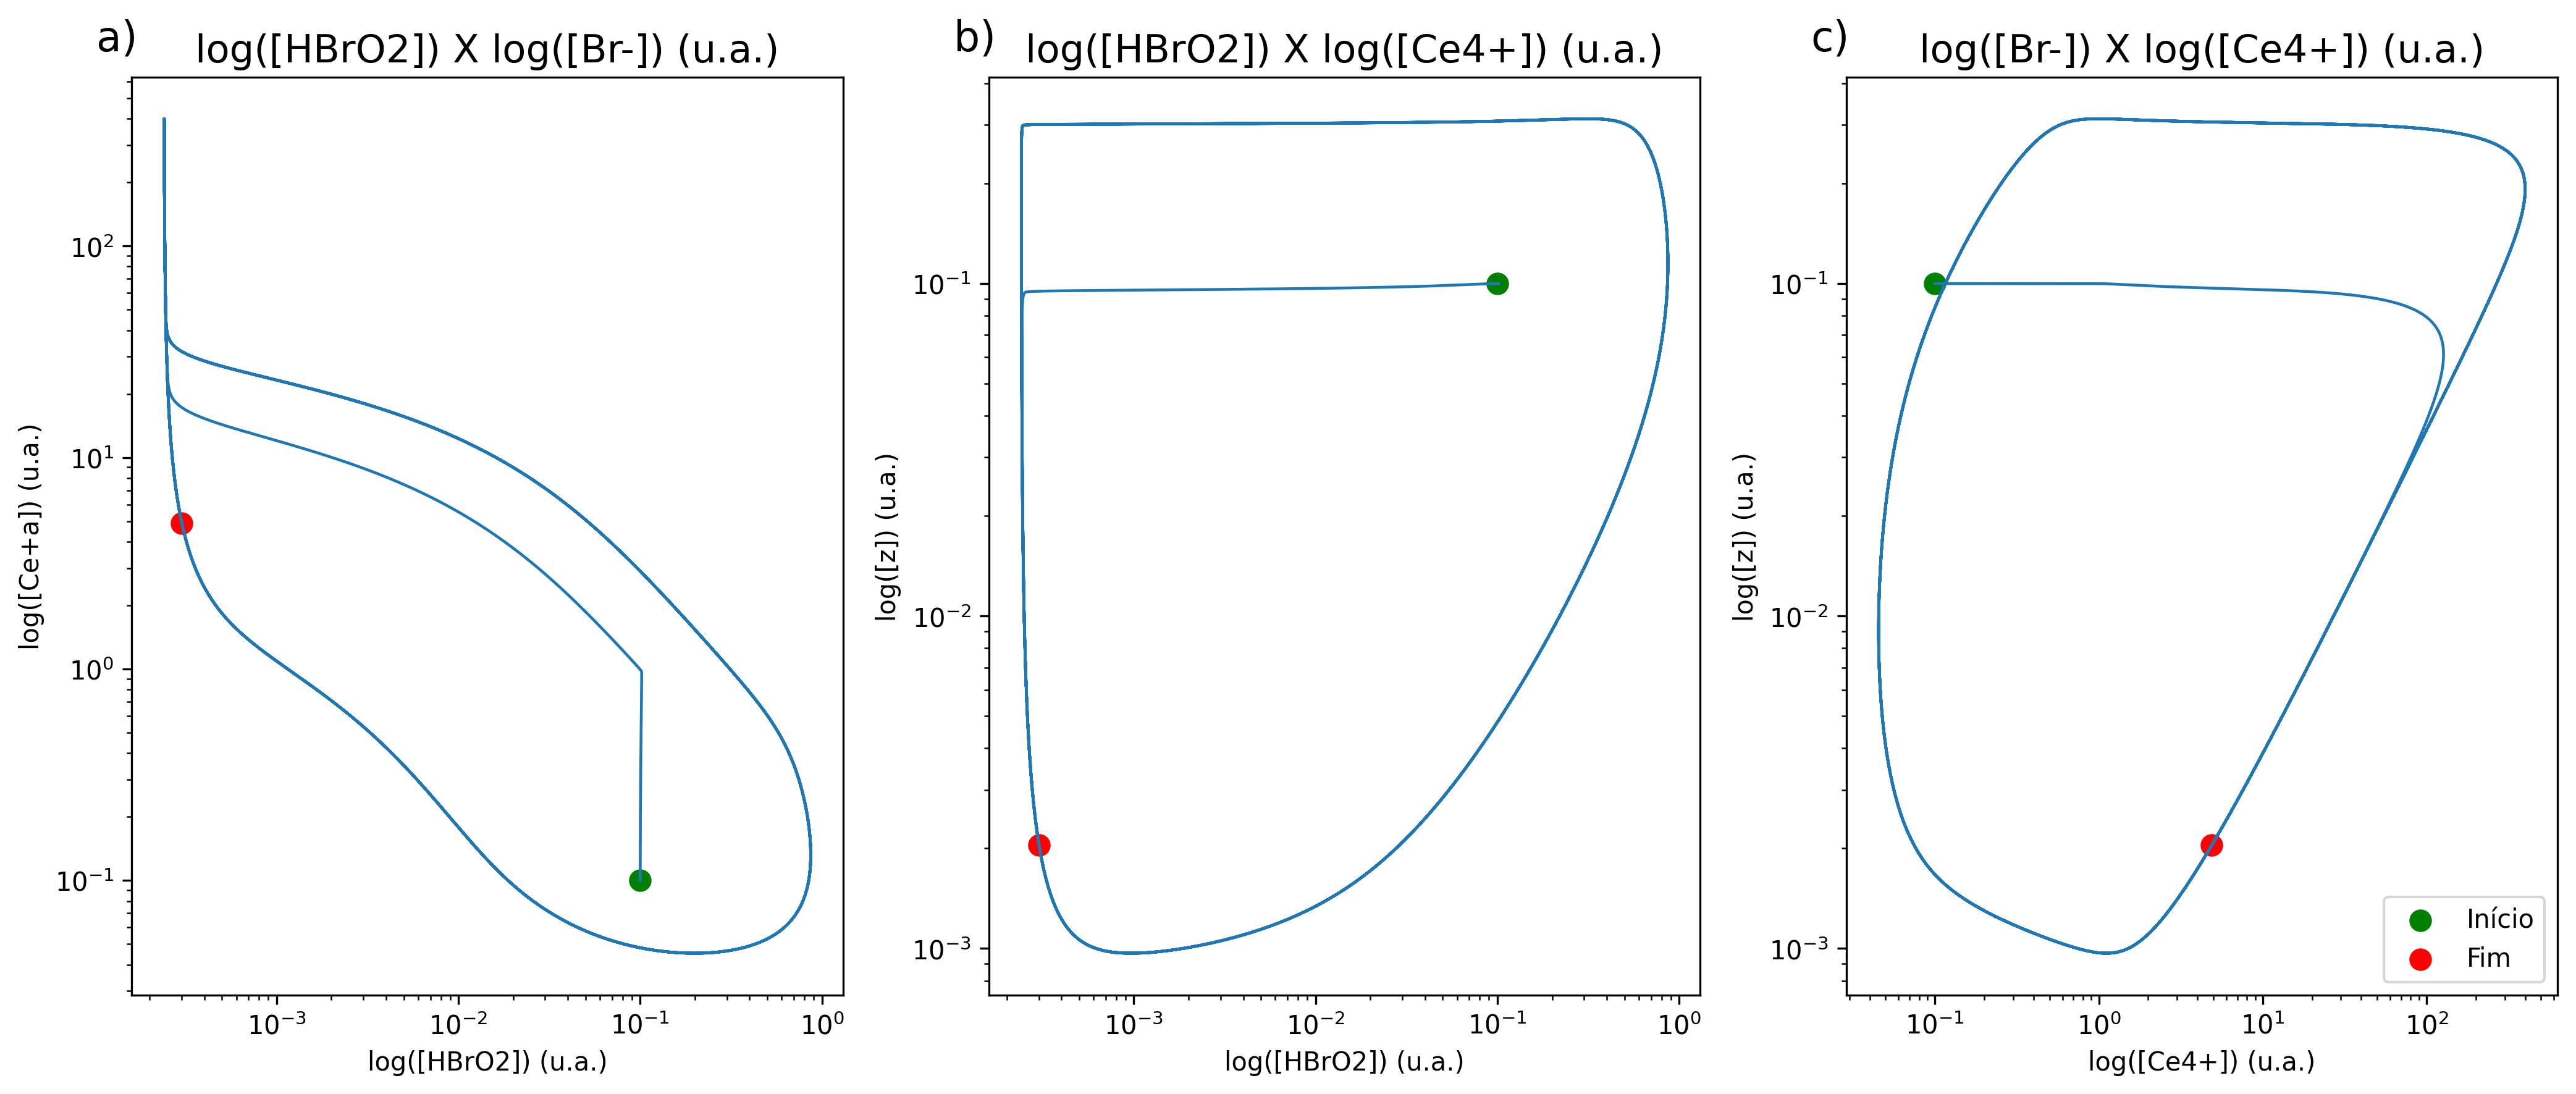

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6), dpi=300)

# X --> HBrO2
# Y --> Ce4+
# Z --> z

s = 60
lw = 1.1
tamanho_titulo = 15

#####----- X com Y -----#####
loc=0
ax[loc].plot(X, Y, lw=lw)
ax[loc].set_yscale('log')
ax[loc].set_xscale('log')
ax[loc].set_title('log([HBrO2]) X log([Br-]) (u.a.)', fontsize=tamanho_titulo)
ax[loc].set_xlabel('log([HBrO2]) (u.a.)')
ax[loc].set_ylabel('log([Ce+a]) (u.a.)')
# Marcar o final e o inicial
ax[loc].scatter(X[0], Y[0], color='green', s=s, label='Início')
ax[loc].scatter(X[-1], Y[-1], color='red', s=s, label='Fim')

# índice (a)
# x,y em coordenadas do eixo (0 = canto esquerdo, 1 = topo)
ax[loc].text(-0.05, 1.02, 'a)', transform=ax[loc].transAxes, ha='left', va='bottom', fontsize=16)



#####----- X com Z -----#####
loc=1
ax[loc].plot(X, Z, lw=lw)
ax[loc].set_yscale('log')
ax[loc].set_xscale('log')
ax[loc].set_title('log([HBrO2]) X log([Ce4+]) (u.a.)', fontsize=tamanho_titulo)
ax[loc].set_xlabel('log([HBrO2]) (u.a.)')
ax[loc].set_ylabel('log([z]) (u.a.)')
# Marcar o final e o inicial
ax[loc].scatter(X[0], Z[0], color='green', s=s, label='Início')
ax[loc].scatter(X[-1], Z[-1], color='red', s=s, label='Fim')

# índice (b)
# x,y em coordenadas do eixo (0 = canto esquerdo, 1 = topo)
ax[loc].text(-0.05, 1.02, 'b)', transform=ax[loc].transAxes, ha='left', va='bottom', fontsize=16)



#####----- Y com Z -----#####
loc=2
ax[loc].plot(Y, Z, lw=lw)
ax[loc].set_yscale('log')
ax[loc].set_xscale('log')
ax[loc].set_title('log([Br-]) X log([Ce4+]) (u.a.)', fontsize=tamanho_titulo)
ax[loc].set_xlabel('log([Ce4+]) (u.a.)')
ax[loc].set_ylabel('log([z]) (u.a.)')
# Marcar o final e o inicial
ax[loc].scatter(Y[0], Z[0], color='green', s=s, label='Início')
ax[loc].scatter(Y[-1], Z[-1], color='red', s=s, label='Fim')

# índice (c)
# x,y em coordenadas do eixo (0 = canto esquerdo, 1 = topo)
ax[loc].text(-0.05, 1.02, 'c)', transform=ax[loc].transAxes, ha='left', va='bottom', fontsize=16)


plt.legend()

plt.tight_layout()
plt.savefig('2a2_Euler_Oregonator.pdf', dpi=300, bbox_inches='tight')
plt.savefig('2a2_Euler_Oregonator.png', dpi=300, bbox_inches='tight')
plt.show()

Pode-se notar que há um ciclo em que o modelo fica continualmente oscilando. Chegar no ciclo independe de onde se começa nesse plano. Com o gráfico 2D pode-se analisar com mais detalhes o comportamento dos reagentes dois a dois. Um dos pontos que chama a atenção é o ponto de início do plot c), pois esse já está próximo do circuito oscilatório, contudo, desloca-se até o outro lado para entrar efetivamente no ciclo. Isto se deve ao fato de que o problema é mais complexo que apenas dois reagentes

## Conclusão

Foi possível criar um código que resolve o sistema de equações diferenciais acopladas com um código em python. Como já era de se esperar, mesmo com um passo pequeno o tempo de execução do programa não foi um problema, dado que esse método é, entre todos, o com menor custo computacional. Ainda assim, o método conseguiu acompanhar o padrão oscilatório da ração Belousov–Zhabotinsky [1], promovendo um análise qualitativa das concentrações do meio reacional.

Como perspectivas de desenvolvimento, seria de grande interesse testar o padrão oscilatório dessa reação para diferentes valores iniciais de concentrações, assim como testar pontos mais próximos do ciclo do plano de fase com o objetivo de entender como essa reação caminha para seu padrão oscilatório. Isso levaria a uma análise mais quantitativa do modelo.

## Referências

[1] LespritSorcier. Reação oscilante de Belousov–Zhabotinsky. https://lespritsorcier.
org/blogs-membres/reaction-oscillante-de-belousov-zhabotinsky/. Acesso em: 25
nov. 2025. n.d.